In [289]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
import matplotlib
from numpy import inf

matplotlib.rcParams['axes.unicode_minus'] = False
warnings.filterwarnings('ignore')
plt.style.use('seaborn')
plt.rcParams['font.family'] = 'Malgun Gothic'
%matplotlib inline

* A : 코로나 이전 시기(2019, 2020)
* B : 코로나 확산 시기(2019, 2020)
* C : 코로나 완화 시기(2019, 2020)
* D : 코로나 회복 시기(2019, 2020)

In [166]:
pup = pd.read_csv('local_people_melt.csv')
pup['MONTH_DAY'] = pup['STD_DD'].astype('str').str[-5:]
pup['period'] = np.where(pup['MONTH_DAY'] < '02-21', 'A',np.where(pup['MONTH_DAY'] < '03-16','B', np.where(pup['MONTH_DAY'] < '05-06','C',np.where(pup['MONTH_DAY'] >'05-05', 'D','A'))))
pup['GU_NM'] = pup['G_DNG_NM'].str[:6]
pup['YEAR'] = pup['STD_DD'].str[:4]

In [227]:
pup = pup.query('9 <= 시간대구분 <= 21')

In [292]:
flow = pd.read_csv('FLOW_AGE_MELT.csv')
adres_dict = pd.DataFrame(pd.read_pickle('card_code_to_name_dict.pickle')).reset_index(drop=True)
adres_dict = adres_dict.rename(columns={'행정동명':'HDONG_NM','구명':'GU_NM'})
flow = pd.merge(flow,adres_dict,on='HDONG_NM')

flow['MONTH_DAY'] = flow['STD_YMD'].str[-5:]
flow['period'] = np.where(flow['MONTH_DAY'] < '02-21', 'A',np.where(flow['MONTH_DAY'] < '03-16','B', np.where(flow['MONTH_DAY'] < '05-06','C',np.where(flow['MONTH_DAY'] >'05-05', 'D','A'))))

------------------

In [50]:
card = pd.read_csv('CARD_SPENDING_RESIDENT_KOR.csv')
card['STD_DD'] = card['STD_DD'].apply(lambda x: pd.to_datetime(x,format='%Y%m%d'))

card['WEEKDAY'] = card['STD_DD'].dt.dayofweek

card['WEEK_NUM'] = card['STD_DD'].dt.weekofyear

card['MONTH_DAY'] = card['STD_DD'].astype('str').str[-5:]

In [140]:
card['period'] = np.where(card['MONTH_DAY'] < '02-21', 'A',np.where(card['MONTH_DAY'] < '03-16','B', np.where(card['MONTH_DAY'] < '05-06','C',np.where(card['MONTH_DAY'] >'05-05', 'D','A'))))

In [64]:
ha = card[(card['MCT_CAT_CD'] == "가전") & (card['GU_CD'].str.startswith('서울'))]
haha = card[(card['MCT_CAT_CD'] == "가전") & (card['GU_CD'].str.startswith('대구'))]

------------------

# 시기별 행정구/행정동 생활인구 알아보기

In [295]:
gu_pup_per = pup.groupby(['GU_NM','YEAR','시간대구분','period'])['FLOW'].sum().reset_index().pivot_table(index=['GU_NM','시간대구분','period'],columns='YEAR',values='FLOW')
gu_pup_per['per'] = (gu_pup_per['2020'] - gu_pup_per['2019'])/(gu_pup_per['2019'] + gu_pup_per['2020'])
gu_pup_per1 = pd.melt(gu_pup_per.reset_index(), id_vars=['GU_NM','시간대구분','period'],var_name='cat',value_name='flow')

In [296]:
gu_pup_per = pup.groupby(['GU_NM','YEAR','period'])['FLOW'].sum().reset_index().pivot_table(index=['GU_NM','period'],columns='YEAR',values='FLOW')
gu_pup_per['per'] = (gu_pup_per['2020'] - gu_pup_per['2019'])/(gu_pup_per['2019'] + gu_pup_per['2020'])
gu_pup_per2 = pd.melt(gu_pup_per.reset_index(), id_vars=['GU_NM','period'],var_name='cat',value_name='flow')

In [320]:
gu_pup_per = pup.groupby(['GU_NM','SEX_CD','YEAR','period'])['FLOW'].sum().reset_index().pivot_table(index=['GU_NM','SEX_CD','period'],columns='YEAR',values='FLOW')
gu_pup_per['per'] = (gu_pup_per['2020'] - gu_pup_per['2019'])/(gu_pup_per['2019'] + gu_pup_per['2020'])
gu_pup_per3 = pd.melt(gu_pup_per.reset_index(), id_vars=['GU_NM','SEX_CD','period'],var_name='cat',value_name='flow')

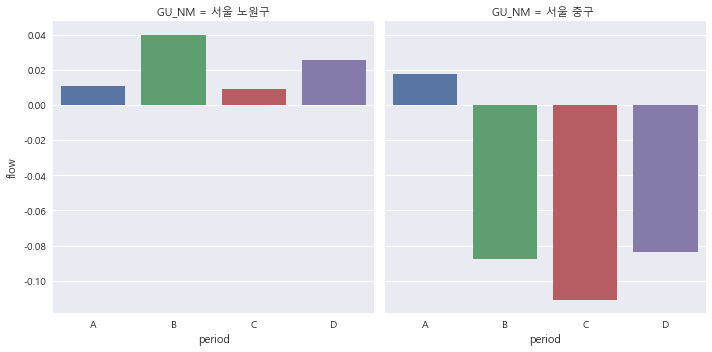

In [298]:
## 2019년 대비 2020년대의 생활인구 증감폭(기간)
# sns.catplot(x="시간대구분",y="flow",col='cat',hue='period',row='GU_NM',data=gu_flow_per,kind='bar')
sns.catplot(x="period",y="flow",col='GU_NM',data=gu_pup_per2.query('cat == "per"'),kind='bar')

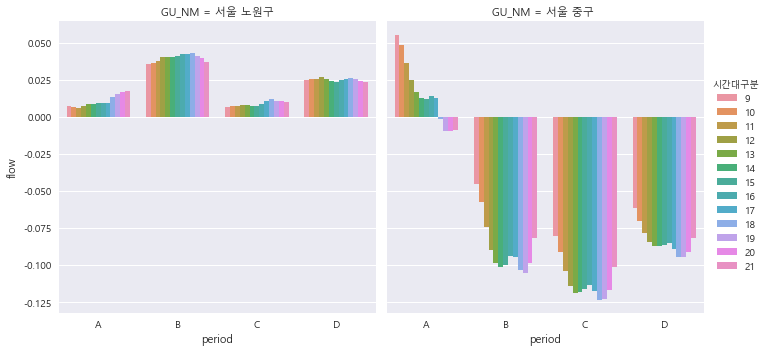

In [321]:
## 2019년 대비 2020년대의 생활인구 증감폭(시간)
sns.catplot(x="period",y="flow",hue='시간대구분',col='GU_NM',data=gu_pup_per1.query('cat == "per"'),kind='bar')

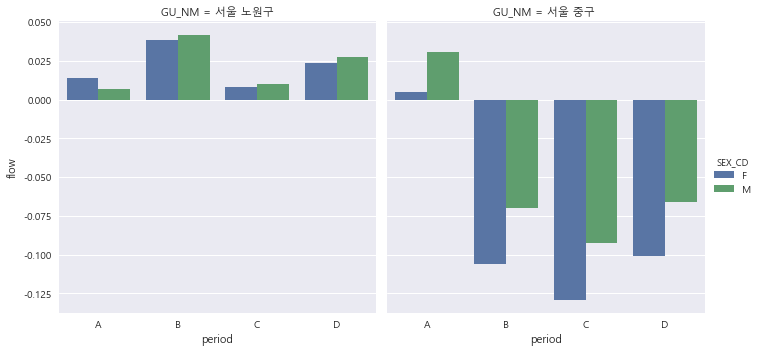

In [322]:
sns.catplot(x="period",y="flow",col='GU_NM',hue='SEX_CD',data=gu_pup_per3.query('cat == "per"'),kind='bar')

In [268]:
dong_pup_per = pup.groupby(['HDONG_NM','YEAR','period'])['FLOW'].sum().reset_index().pivot_table(index=['HDONG_NM','period'],columns='YEAR',values='FLOW')
dong_pup_per['per'] = (dong_pup_per['2020'] - dong_pup_per['2019'])/(dong_pup_per['2019'] + dong_pup_per['2020'])
dong_pup_per = pd.melt(dong_pup_per.reset_index(), id_vars=['HDONG_NM','period'],var_name='cat',value_name='flow')

C:\Users\ghdwl\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)


C:\Users\ghdwl\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


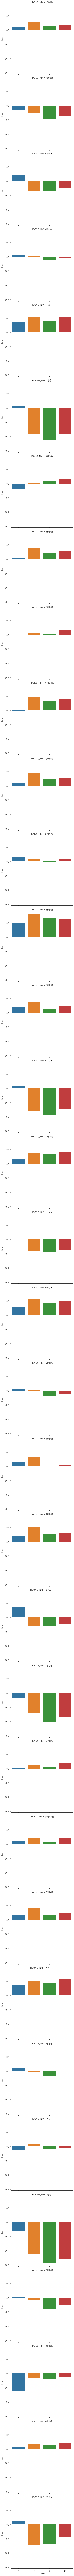

In [277]:
#sns.catplot(x="period",y="flow",col='cat',row='HDONG_NM',data=dong_flow_per,kind='bar')
sns.catplot(x="period",y="flow",row='HDONG_NM',data=dong_pup_per.query('cat == "per"'),kind='bar')

# 시기별 행정구/행정동 유동인구 알아보기

## 연령별 유동인구

In [316]:
gu_flow_per = flow.groupby(['GU_NM','YEAR','AGE_CD','period'])['FLOW'].sum().reset_index().pivot_table(index=['GU_NM','AGE_CD','period'],columns='YEAR',values='FLOW')
gu_flow_per['per'] = (gu_flow_per[2020] - gu_flow_per[2019])/(gu_flow_per[2019] + gu_flow_per[2020])
gu_flow_per1 = pd.melt(gu_flow_per.reset_index(), id_vars=['GU_NM','AGE_CD','period'],var_name='cat',value_name='flow')

In [317]:
gu_flow_per = flow.groupby(['GU_NM','YEAR','period'])['FLOW'].sum().reset_index().pivot_table(index=['GU_NM','period'],columns='YEAR',values='FLOW')
gu_flow_per['per'] = (gu_flow_per[2020] - gu_flow_per[2019])/(gu_flow_per[2019] + gu_flow_per[2020])
gu_flow_per2 = pd.melt(gu_flow_per.reset_index(), id_vars=['GU_NM','period'],var_name='cat',value_name='flow')

In [331]:
gu_flow_per = flow.groupby(['GU_NM','SEX_CD','YEAR','period'])['FLOW'].sum().reset_index().pivot_table(index=['GU_NM','SEX_CD','period'],columns='YEAR',values='FLOW')
gu_flow_per['per'] = (gu_flow_per[2020] - gu_flow_per[2019])/(gu_flow_per[2019] + gu_flow_per[2020])
gu_flow_per3 = pd.melt(gu_flow_per.reset_index(), id_vars=['GU_NM','SEX_CD','period'],var_name='cat',value_name='flow')

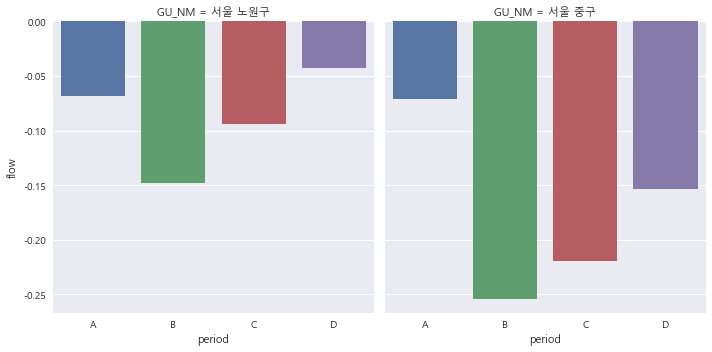

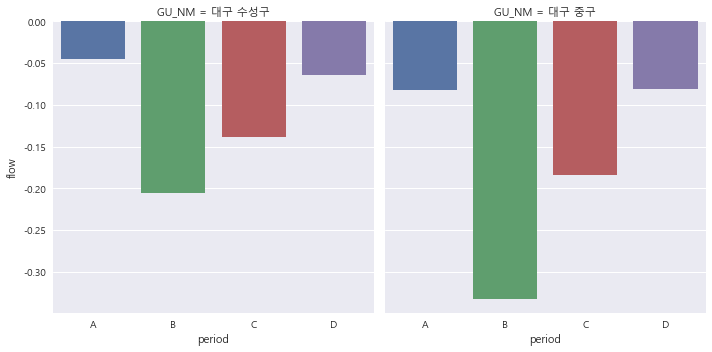

In [319]:
sns.catplot(x="period",y="flow",col='GU_NM',data=gu_flow_per2[gu_flow_per2['GU_NM'].str.startswith('서울')].query('cat == "per"'),kind='bar')
sns.catplot(x="period",y="flow",col='GU_NM',data=gu_flow_per2[gu_flow_per2['GU_NM'].str.startswith('대구')].query('cat == "per"'),kind='bar')

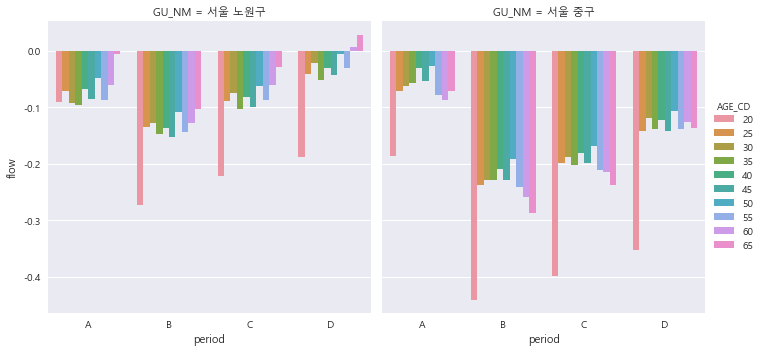

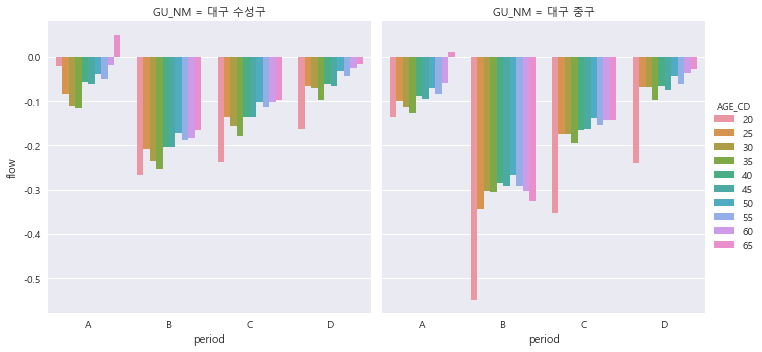

In [318]:
sns.catplot(x="period",y="flow",hue='AGE_CD',col='GU_NM',data=gu_flow_per1[gu_flow_per1['GU_NM'].str.startswith('서울')].query('cat == "per"'),kind='bar')
sns.catplot(x="period",y="flow",hue='AGE_CD',col='GU_NM',data=gu_flow_per1[gu_flow_per1['GU_NM'].str.startswith('대구')].query('cat == "per"'),kind='bar')

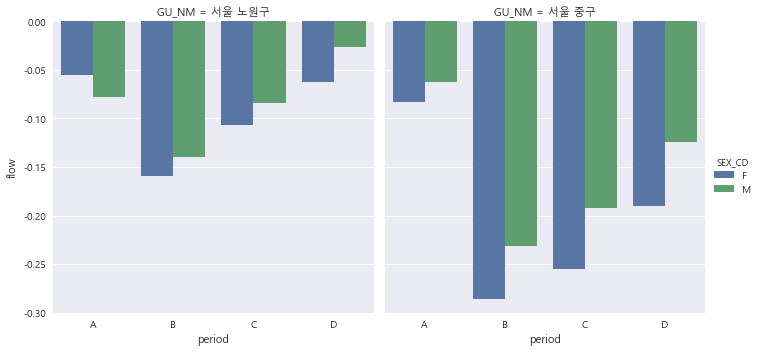

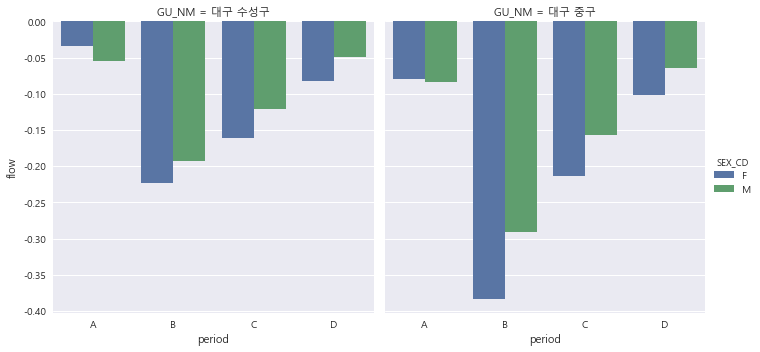

In [332]:
sns.catplot(x="period",y="flow",col='GU_NM',hue='SEX_CD',data=gu_flow_per3[gu_flow_per3['GU_NM'].str.startswith('서울')].query('cat == "per"'),kind='bar')
sns.catplot(x="period",y="flow",col='GU_NM',hue='SEX_CD',data=gu_flow_per3[gu_flow_per3['GU_NM'].str.startswith('대구')].query('cat == "per"'),kind='bar')

## 시간별 유동인구